In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf 
from tensorflow import keras

In [3]:

# 추가 인자를 사용할 때
# model.add(SimpleRNN(hidden_size, input_shape = (timesteps, input_dim))

# 다른 표기
# model.add(SimpleRNN(hidden_size, input_length=M, input_dim=N))

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN

In [5]:
model = Sequential()
model.add(SimpleRNN(3, input_shape=(2,10)))
# model.add(SimpleRNN(3, input_length=2, input_dim=10)) 동일

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 3)                 42        
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


In [7]:
model= Sequential()
model.add(SimpleRNN(3, batch_input_shape=(8, 2, 10)))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (8, 3)                    42        
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


In [9]:
model= Sequential()
model.add(SimpleRNN(3, batch_input_shape=(8, 2, 10), return_sequences=True))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_3 (SimpleRNN)     (8, 2, 3)                 42        
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


In [11]:
# 파이썬으로 RNN 구현 

$$ h_t = tanh(W_x X_t + W_h h_{t-1} +b) $$

```
hidden_state = 0 # 초기 은닉 상태를 0으로 초기화
for input_t in input_length: # 각 시점마다 입력을 받는다.
    output_t = tanh(input_t, hidden_state_t) # 각 시점에 대해서 입력과 은닉 상태를 가지고 연산
    hidden_state_t = output_t # 계산 결과는 현재 시점의 은닉 상태과 된다.
```

In [12]:
import numpy as np

timesteps = 10
input_dim = 4
hidden_size = 8

# 입력에 해당되는 2D 텐서
inputs = np.random.random((timesteps, input_dim))

# 초기 은닉 상태는 0벡터로 초기화
hidden_state_t = np.zeros((hidden_size,))

In [13]:
print(hidden_state_t) # 8의 크기를 가지는 hidden state. 현재는 초기 hidden state로 모든 차원이 0의 값을 가짐

[0. 0. 0. 0. 0. 0. 0. 0.]


In [14]:
Wx = np.random.random((hidden_size, input_dim)) #(8,4) 2D텐서 생성 입력에 대한 가중치
Wh = np.random.random((hidden_size, hidden_size)) # (8,8)크기의 2D텐서 생성. hidden state에 대한 가중치
b = np.random.random((hidden_size,)) #(8,)크기의 1D텐서 생성. 편향(bias)

In [15]:
print(np.shape(Wx)) # hidden state x 입력의 차원
print(np.shape(Wh)) # hidden state x hidden state size
print(np.shape(b)) # hidden state size

(8, 4)
(8, 8)
(8,)


In [16]:
total_hidden_states = []

In [20]:
# 메모리 셀 동작
for input_t in inputs: # 각 시점에 따라서 입력값이 입력이 됨.
  output_t = np.tanh(np.dot(Wx, input_t)+np.dot(Wh, hidden_state_t)+b)
  # Wx - wt + Wh * Ht - 1 + b
  total_hidden_states.append(list(output_t))
  print(np.shape(total_hidden_states))
  hidden_state_t = output_t

total_hidden_state = np.stack(total_hidden_states, axis=0)

# (timesteps, output_dim)
print(total_hidden_states)

(21, 8)
(22, 8)
(23, 8)
(24, 8)
(25, 8)
(26, 8)
(27, 8)
(28, 8)
(29, 8)
(30, 8)
[[0.9838386491059303, 0.770076835437552, 0.9224887360640575, 0.6994842327474045, 0.9596616061147077, 0.9528965847854702, 0.9724652624083193, 0.9692243482226984], [0.9589735585761134, 0.8420335001780916, 0.8844553068451559, 0.6103223154010515, 0.9291369147064692, 0.9386543741344286, 0.9161338267980871, 0.9586590381222299], [0.9826968768036444, 0.8086738238608769, 0.9392755470847042, 0.7773641559921192, 0.9554135208444865, 0.9664098248712547, 0.9757103392640002, 0.9793901238774516], [0.9925189751654574, 0.925476626358321, 0.9803589080293892, 0.7859859509515685, 0.9792399500059114, 0.9822266552762046, 0.9937560983716173, 0.9934438370595099], [0.9963236811973273, 0.965181344826772, 0.9914421639714472, 0.7917630631034344, 0.9877036330645932, 0.9909899786472225, 0.9969362588141479, 0.995817266885955], [0.9682063271666109, 0.47313818578200045, 0.8239036683874684, 0.769965373919287, 0.9201118518717961, 0.9312991110

In [21]:
# 더 깊은 RNN

In [22]:
model = Sequential()
model.add(SimpleRNN(hidden_size, input_length =10, input_dim =5, return_sequences=True))
model.add(SimpleRNN(hidden_size, return_sequences = True))

In [23]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_4 (SimpleRNN)     (None, 10, 8)             112       
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, 10, 8)             136       
Total params: 248
Trainable params: 248
Non-trainable params: 0
_________________________________________________________________


In [24]:
# BiLSTM

In [25]:
from tensorflow.keras.layers import Bidirectional

In [26]:
model = Sequential()
model.add(Bidirectional(SimpleRNN(hidden_size, return_sequences=True, input_shape=(timesteps, input_dim))))

In [27]:
model = Sequential()
model.add(Bidirectional(SimpleRNN(hidden_size, return_sequences=True, input_shape=(timesteps, input_dim))))
model.add(Bidirectional(SimpleRNN(hidden_size, return_sequences=True)))
model.add(Bidirectional(SimpleRNN(hidden_size, return_sequences=True)))
model.add(Bidirectional(SimpleRNN(hidden_size, return_sequences=True)))

- Embedding을 사용하며, 단어 집합(Vocabulary)의 크기가 5,000이고 임베딩 벡터의 차원은 100입니다.
- 은닉층에서는 Simple RNN을 사용하며, 은닉 상태의 크기는 128입니다.
- 훈련에 사용하는 모든 샘플의 길이는 30으로 가정합니다.
- 이진 분류를 수행하는 모델로, 출력층의 뉴런은 1개로 시그모이드 함수를 사용합니다.
- 은닉층은 1개입니다.

Embedding = 5,000(input) * 100(embedding) = 500,000

Wx = 100(embedding) * 128(hidden) = 12,800

Wh = 128 * 128 = 16,384

bias(hidden)  = 128

Wy = 128

bias(output) = 1

total = 529,441

In [28]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import SimpleRNN, LSTM, Bidirectional

In [29]:
train_x = [[0.1, 4.2, 1.5, 1.1, 2.8],
           [1.0, 3.1, 2.5, 0.7, 1.1],
           [0.3, 2.1, 1.5, 2.1, 0.1],
           [2.2, 1.4, 0.5, 0.9, 1.1]]
print(np.shape(train_x)) # 단어 벡터의 차원은 5, 문장의 길이 4

(4, 5)


In [31]:
train_x = [[[0.1, 4.2, 1.5, 1.1, 2.8],
           [1.0, 3.1, 2.5, 0.7, 1.1],
           [0.3, 2.1, 1.5, 2.1, 0.1],
           [2.2, 1.4, 0.5, 0.9, 1.1]]]
train_x = np.array(train_x, dtype=np.float32)
print(train_x.shape) # (batch_size, timesteps, input_dim)

(1, 4, 5)


In [32]:
rnn = SimpleRNN(3)
# rnn = SimpleRNN(3, return_sequences=False, return_state=False)와 동일
hidden_state = rnn(train_x)

print('hidden state : {}, shape: {}'.format(hidden_state, hidden_state.shape))

hidden state : [[ 0.5794165   0.99769837 -0.51125103]], shape: (1, 3)


In [33]:
rnn = SimpleRNN(3, return_sequences=True)
hidden_states = rnn(train_x)

print('hidden state : {}, shape : {}'.format(hidden_states, hidden_states.shape))


hidden state : [[[ 0.8706572   0.05043602  0.9996683 ]
  [ 0.22416614  0.00202527  0.9988697 ]
  [-0.84857035 -0.70359105  0.95521146]
  [-0.58897966 -0.08481254  0.9729451 ]]], shape : (1, 4, 3)


In [34]:
rnn = SimpleRNN(3, return_sequences=True, return_state=True)
hidden_states, last_states = rnn(train_x)

print('hidden states : {}, shape: {}'.format(hidden_states, hidden_states.shape))
print('last hidden state : {}, shape : {}'.format(last_states, last_states.shape))

hidden states : [[[-0.00824077 -0.9998381   0.71205384]
  [-0.23829313 -0.9997198  -0.76778626]
  [ 0.37827384 -0.9812992   0.4040495 ]
  [-0.919181   -0.9849047  -0.5470432 ]]], shape: (1, 4, 3)
last hidden state : [[-0.919181  -0.9849047 -0.5470432]], shape : (1, 3)


In [35]:
rnn = SimpleRNN(3, return_sequences=False, return_state=True)
hidden_state, last_state = rnn(train_x)

print('hidden state : {}, shape : {}'.format(hidden_state, hidden_state.shape))
print('last hidden state : {}, shape : {}'.format(last_state, last_state.shape))

hidden state : [[-0.87523395  0.68842053  0.85917026]], shape : (1, 3)
last hidden state : [[-0.87523395  0.68842053  0.85917026]], shape : (1, 3)


In [36]:
# LSTM 이해하기

In [37]:
lstm = LSTM(3, return_sequences=False, return_state=True)
hidden_state, last_state, last_cell_state = lstm(train_x)

print('hidden state : {}, shape : {}'.format(hidden_state, hidden_state.shape))
print('last hidden state : {}, shape : {}'.format(last_state, last_state.shape))
print('last cell state : {}, shape : {}'.format(last_cell_state, last_cell_state.shape))

hidden state : [[-0.58136964 -0.40571308 -0.52176964]], shape : (1, 3)
last hidden state : [[-0.58136964 -0.40571308 -0.52176964]], shape : (1, 3)
last cell state : [[-0.9808514 -0.8752838 -0.7613952]], shape : (1, 3)


In [38]:
lstm = LSTM(3, return_sequences= True, return_state = True)
hidden_states, last_hidden_state, last_cell_state = lstm(train_x)

print('hidden states : {}, shape : {}'.format(hidden_states, hidden_states.shape))
print('last hidden state : {}, shape : {}'.format(last_hidden_state, last_hidden_state.shape))
print('last cell state : {}, shape : {}'.format(last_cell_state, last_cell_state.shape))

hidden states : [[[-0.0072456  -0.04492022  0.55612576]
  [-0.02421456  0.0515529   0.45310247]
  [-0.0364001   0.11292644  0.45033845]
  [-0.11264873  0.14021431  0.37486643]]], shape : (1, 4, 3)
last hidden state : [[-0.11264873  0.14021431  0.37486643]], shape : (1, 3)
last cell state : [[-0.24945828  0.17665888  0.44987005]], shape : (1, 3)


In [39]:
# LSTM 이해하기2

In [40]:
x = np.array([[1,2, 3],
              [2,3,4],
              [3,4,5],
              [4,5,6],
              [5,6,7],
              [6,7,8],
              [7,8,9],
              [8,9,10],
              [9,10,11],
              [10, 11, 12],
              [20, 30, 40],
              [30, 40, 50],
              [40, 50, 60]])

In [42]:
y = np.array([4,5,6,7,8,9,10,11,12,13,50,60,70])

print(x.shape, y.shape)

(13, 3) (13,)


In [45]:
x = x.reshape((x.shape[0], x.shape[1], 1))
print(x.shape)

(13, 3, 1)


In [48]:
import tensorflow as tf
from tensorflow import keras

In [50]:
model = keras.Sequential()
model.add(keras.layers.LSTM(20, activation='relu', input_shape=(3,1)))
model.add(keras.layers.Dense(5, activation='relu'))
model.add(keras.layers.Dense(1))

In [51]:
model.compile(optimizer='adam', loss = 'mse')

In [52]:
es = keras.callbacks.EarlyStopping(monitor='loss', patience=10, mode='auto')
model.fit(x, y, epochs=1000, batch_size=1, verbose=1, callbacks=[es])

Epoch 1/1000
13/13 [==============================] - 1s 2ms/step - loss: 907.8699
Epoch 2/1000
13/13 [==============================] - 0s 2ms/step - loss: 907.5165
Epoch 3/1000
13/13 [==============================] - 0s 2ms/step - loss: 907.1533
Epoch 4/1000
13/13 [==============================] - 0s 2ms/step - loss: 906.8046
Epoch 5/1000
13/13 [==============================] - 0s 2ms/step - loss: 906.4317
Epoch 6/1000
13/13 [==============================] - 0s 2ms/step - loss: 906.0931
Epoch 7/1000
13/13 [==============================] - 0s 2ms/step - loss: 905.7289
Epoch 8/1000
13/13 [==============================] - 0s 2ms/step - loss: 905.3903
Epoch 9/1000
13/13 [==============================] - 0s 2ms/step - loss: 905.0020
Epoch 10/1000
13/13 [==============================] - 0s 2ms/step - loss: 904.6796
Epoch 11/1000
13/13 [==============================] - 0s 2ms/step - loss: 904.3001
Epoch 12/1000
13/13 [==============================] - 0s 2ms/step - loss: 903.9278
E

In [53]:
x_test = np.array([25, 35, 45])
x_test = x_test.reshape((1, 3, 1))

pred = model.predict(x_test)
pred

array([[7.5958824]], dtype=float32)

In [55]:
import time
import requests
import pandas as pd
import numpy as np 
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras 

In [56]:
stock_price = pd.DataFrame() # 주가 데이터를 저장할 데이터프레임

In [57]:
stock_number = "035420"
pages = 50

In [58]:
for page in range(1, pages+1):
    url = f'https://finance.naver.com/item/sise_day.nhn?code={stock_number}&page={page}'
    headers = {'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.96 Safari/537.36'}
    response = requests.get(url, headers=headers)
    time.sleep(0.5)
    html = BeautifulSoup(response.text, "lxml")

    table = html.select("table")

    juga = pd.read_html(str(table))
    juga = juga[0].dropna()
    stock_price = pd.concat([stock_price,juga], axis=0)

In [59]:
stock_price = stock_price.reset_index(drop=True)

In [60]:
stock_price.tail()

,날짜,종가,전일비,시가,고가,저가,거래량
495,2019.10.31,164000.0,9500.0,159000.0,167000.0,157500.0,1409619.0
496,2019.10.30,154500.0,1500.0,152000.0,154500.0,151500.0,290658.0
497,2019.10.29,153000.0,4000.0,157500.0,158000.0,152000.0,321007.0
498,2019.10.28,157000.0,4500.0,152500.0,158000.0,152500.0,335238.0
499,2019.10.25,152500.0,500.0,151000.0,153500.0,151000.0,162510.0


In [61]:
stock_price["날짜"] = pd.to_datetime(stock_price["날짜"])

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51333 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_te

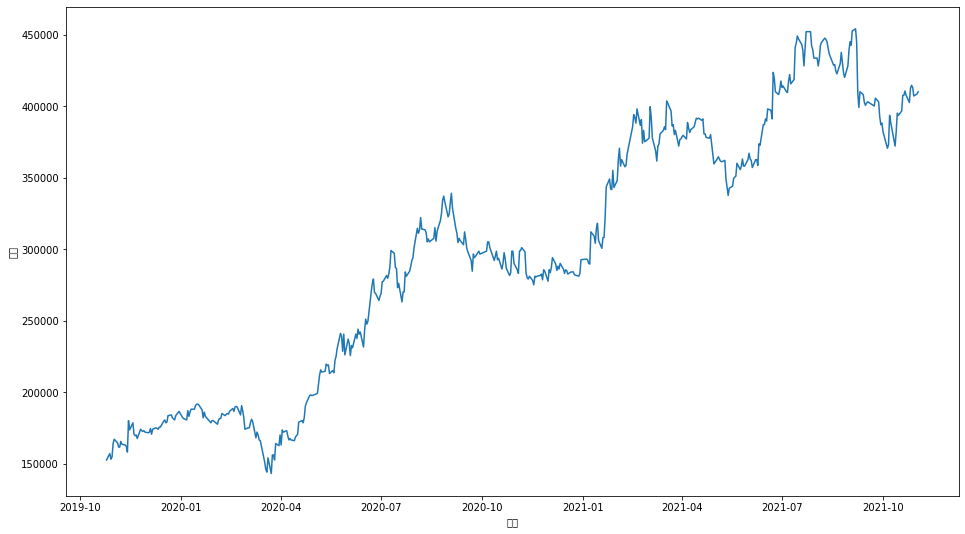

In [62]:
plt.figure(figsize=(16, 9))
sns.lineplot(y=stock_price['종가'], x=stock_price['날짜'])
plt.show()

In [63]:
# minmax

scaler = MinMaxScaler()
scale_cols=['시가', '고가', '저가', '거래량']
scaled = scaler.fit_transform(stock_price[scale_cols])

scaled_stock = pd.DataFrame(scaled)

In [64]:
scaled_stock.columns = scale_cols

In [65]:
scaled_stock

,시가,고가,저가,거래량
0,0.841444,0.839937,0.864353,0.059531
1,0.833595,0.830428,0.848580,0.055560
2,0.852433,0.839937,0.853312,0.098544
3,0.871272,0.855784,0.872240,0.105766
4,0.858713,0.854200,0.872240,0.106513
...,...,...,...,...
495,0.054945,0.055468,0.070978,0.396986
496,0.032967,0.015848,0.052050,0.040793
497,0.050235,0.026941,0.053628,0.050454
498,0.034537,0.026941,0.055205,0.054984


In [66]:
end_price = np.log1p(stock_price["종가"])

In [67]:
scaled_stock["종가"] = end_price

In [68]:
train = scaled_stock[:-30]
test = scaled_stock[-30:]

In [69]:
def make_dataset(data, label, window_size=20):
    feature_list = []
    label_list = []
    for i in range(len(data)- window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [70]:
train_feature = train[['시가', '고가', '저가', '거래량']]
train_label = train['종가']

test_feature = test[['시가', '고가', '저가', '거래량']]
test_label = test[['종가']]

In [71]:
train_feature, train_label = make_dataset(train_feature, train_label, 10)

# train, validation set생성
x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)

# test dataset (실제 예측 해볼 데이터)
test_feature, test_label = make_dataset(test_feature, test_label, 10)

In [72]:
train_feature.shape[1], train_feature.shape[2]

(10, 4)

In [73]:
train_feature.shape

(460, 10, 4)

In [74]:
model = keras.Sequential([
                          keras.layers.LSTM(16, input_shape=(10, 4), activation='relu'),
                          keras.layers.Dense(1)
])

In [75]:
model.compile(
    optimizer = 'adam',
    loss= 'mse'
)

In [76]:
epoch = 500
batch_size = 64

es = keras.callbacks.EarlyStopping(monitor='val_loss', patience=7)
cp = keras.callbacks.ModelCheckpoint('predict_juga_2.h5', monitor='val_loss', save_best_only=True)

In [77]:
history = model.fit(x_train, y_train,
                    epochs= epoch,
                    batch_size = batch_size,
                    validation_data = (x_valid, y_valid),
                    callbacks=[es, cp])

Epoch 1/500
6/6 [==============================] - 1s 53ms/step - loss: 164.6609 - val_loss: 163.5379
Epoch 2/500
6/6 [==============================] - 0s 8ms/step - loss: 163.3285 - val_loss: 162.3381
Epoch 3/500
6/6 [==============================] - 0s 7ms/step - loss: 162.2019 - val_loss: 161.2927
Epoch 4/500
6/6 [==============================] - 0s 8ms/step - loss: 161.2062 - val_loss: 160.4002
Epoch 5/500
6/6 [==============================] - 0s 7ms/step - loss: 160.3962 - val_loss: 159.6433
Epoch 6/500
6/6 [==============================] - 0s 7ms/step - loss: 159.6410 - val_loss: 158.8782
Epoch 7/500
6/6 [==============================] - 0s 8ms/step - loss: 158.8204 - val_loss: 157.9613
Epoch 8/500
6/6 [==============================] - 0s 8ms/step - loss: 157.7564 - val_loss: 156.6759
Epoch 9/500
6/6 [==============================] - 0s 8ms/step - loss: 155.9466 - val_loss: 154.1401
Epoch 10/500
6/6 [==============================] - 0s 8ms/step - loss: 152.6291 - val_los

In [78]:
# 최고의 모델을 가져와서 test
loaded_models = keras.models.load_model("predict_juga_2.h5")

In [79]:
pred = loaded_models.predict(test_feature)

In [80]:
pred = np.expm1(pred)

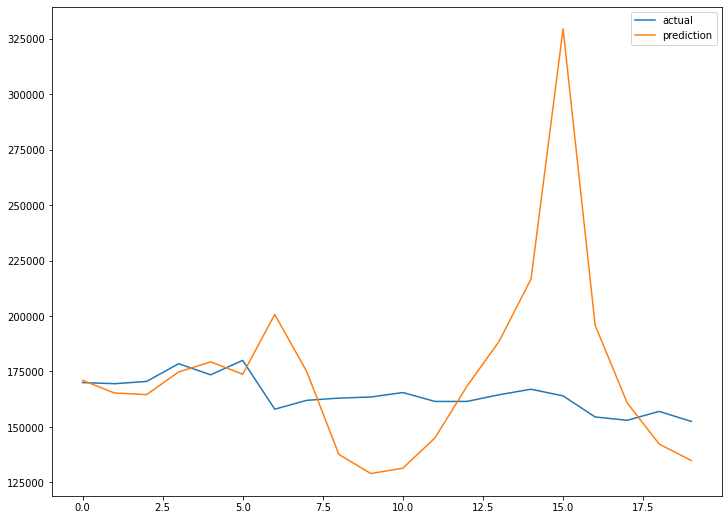

In [81]:
plt.figure(figsize=(12, 9))
plt.plot(np.expm1(test_label), label='actual')
plt.plot(pred, label = 'prediction')
plt.legend()
plt.show()